# Introduction
feature: 뉴스기사, 최대거래대금, 매수등락률   
label: 수익률(1,0)  
책: 파이썬 라이브러리를 활용한 머신러닝, p90-91  
유튜브1: https://youtu.be/EWbTscn1TjU  
유튜브2: https://youtu.be/qnNkRvf4PDc  
유튜브3: https://youtu.be/bu8_hpTGrTU

# Import

In [1523]:
import pandas as pd
import numpy as np
import datetime

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# Load

In [1524]:
df = pd.read_csv('data.csv')
df.head()

,주문일자,종목명,매수가격,매수시간,매도시간,수익률,종목코드,뉴스기사,최대거래대금 시간,최대거래대금,매수등락률,단기과열
0,2022-03-29,고려시멘트,5230,09:09:07,09:21:27,2.87,198440,1,09:06:00,113,16.22,True
1,2022-03-29,고려시멘트,5410,09:28:09,09:32:19,1.85,198440,1,09:06:00,113,20.22,True
2,2022-03-29,고려시멘트,5440,10:38:18,10:51:17,0.15,198440,1,09:06:00,113,20.89,True
3,2022-03-29,영진약품,5490,09:51:11,09:55:24,0.66,3520,1,09:50:00,62,6.60,False
4,2022-03-29,버킷스튜디오,5060,09:58:16,09:59:56,-0.59,66410,1,09:22:00,72,11.58,False


# Preprocessing
① 수익률 → 1 or 0  
② feature → float64   

In [1525]:
df['수익률'] = df['수익률'].apply(lambda x : x - 0.3)
df['수익률'] = df['수익률'].apply(lambda x : 1 if x > 0 else 0 )
df['수익률'].unique()

array([1, 0], dtype=int64)

In [1526]:
df['뉴스기사'] = df['뉴스기사'].astype('float64')
df['최대거래대금'] = df['최대거래대금'].astype('float64')
df['매수등락률'] = df['매수등락률'].astype('float64')

In [1527]:
X = df[['뉴스기사', '최대거래대금', '매수등락률']]
y = df['수익률']

In [1528]:
X.shape, y.shape

((129, 3), (129,))

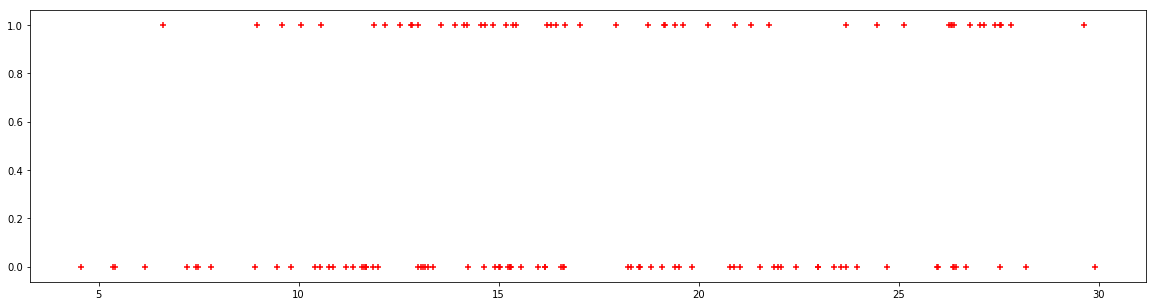

In [1543]:
plt.scatter(df.매수등락률, df.수익률, marker='+', color='red')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

# Train Test Split

In [1529]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Scaling

In [1530]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model

In [1531]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
logreg = LogisticRegression().fit(X_train, y_train)
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Weight & Bias
기울기 파라미터(w) = 가중치(weight) = 계수(coefficient) = coef_ 속성  
절편 파라미터(b) = 편향(offset) = 절편(intercept) = intercept_ 속성  

In [1532]:
print('logreg100.coef_:', logreg100.coef_)
print('logreg100.intercept_:', logreg100.intercept_)
print('')

print('logreg.coef_:', logreg.coef_)
print('logreg.intercept_:', logreg.intercept_)
print('')

print('logreg001.coef_:', logreg001.coef_)
print('logreg001.intercept_:', logreg001.intercept_)

logreg100.coef_: [[0.57688684 0.47477816 0.69267087]]
logreg100.intercept_: [-1.26998139]

logreg.coef_: [[0.3465032  0.06496174 0.2493914 ]]
logreg.intercept_: [-0.75389703]

logreg001.coef_: [[-0.02572034 -0.00871717 -0.02397782]]
logreg001.intercept_: [-0.06610767]


### Score

In [1533]:
print('훈련 세트 점수: {:.2f}'.format(logreg100.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(logreg100.score(X_test, y_test)))
print('')

print('훈련 세트 점수: {:.2f}'.format(logreg.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(logreg.score(X_test, y_test)))
print('')

print('훈련 세트 점수: {:.2f}'.format(logreg001.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.65
테스트 세트 점수: 0.64

훈련 세트 점수: 0.59
테스트 세트 점수: 0.64

훈련 세트 점수: 0.59
테스트 세트 점수: 0.64


### Coefficient Visualization

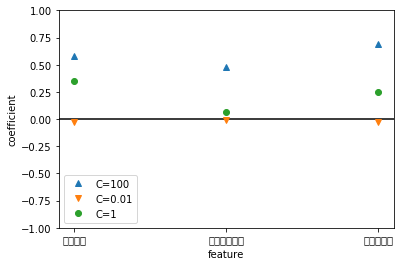

In [1534]:
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.xticks(range(X.shape[1]), X.columns)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-1,1)
plt.xlabel('feature')
plt.ylabel('coefficient')
plt.legend()
plt.show()

# Confusion Matrix
logreg100 선택 (C=100)

In [1535]:
y_pred = logreg100.predict(X_test)

In [1536]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[19,  2],
       [10,  2]], dtype=int64)

# Visualization

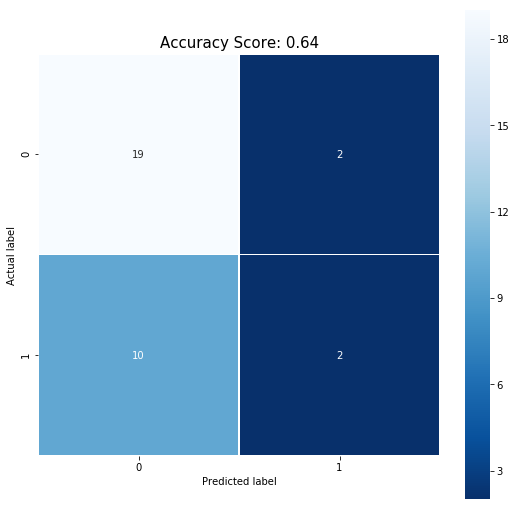

In [1537]:
plt.figure(figsize=(9,9))
sns.heatmap(cnf_matrix, annot=True, linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

score = round(logreg100.score(X_test, y_test),2)
title = 'Accuracy Score: {0}'.format(score)
plt.title(title, size=15)

plt.show()

# Predict

In [1547]:
logreg.predict([[1,1,1]])

array([0], dtype=int64)

# Results
Score = 0.64

# Conclusion
데이터의 상관관계가 뚜렷하지 않으므로 Score가 비약적으로 개선되지 않는 것 같다.  
추후 깔끔한 데이터가 수집되고 의미 있는 feature들을 추가하면서 점차적으로 발전할 것으로 보인다.